In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from ml_lib import MultinomialNB as MNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [4]:
mnb_cs = MNB()
mnb_sk = MultinomialNB()

vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(data.data)
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), data.target)

preds_cs = mnb_cs.fit(X_train, y_train).predict(X_test)
preds_sk = mnb_sk.fit(X_train, y_train).predict(X_test)

print("Custom MNB Accuracy Score:", accuracy_score(y_test, preds_cs))
print("Sklearn MNB Accuracy Score:", accuracy_score(y_test, preds_sk))

Custom MNB Accuracy Score: 0.6224814422057264
Sklearn MNB Accuracy Score: 0.6224814422057264


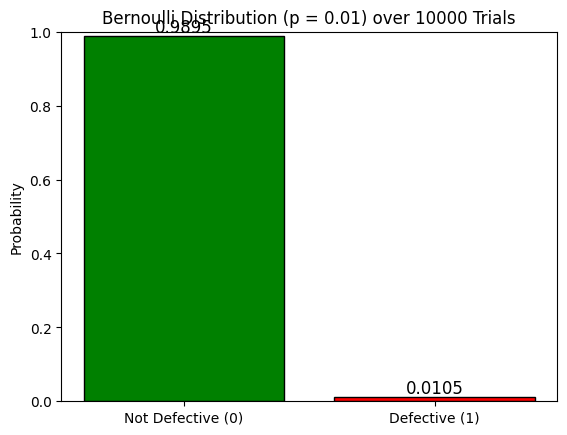

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.01  # probability of defect
n_samples = 10_000

# Simulate Bernoulli trials
samples = np.random.binomial(n=1, p=p, size=n_samples)

# Count outcomes
counts = np.bincount(samples, minlength=2)
labels = ['Not Defective (0)', 'Defective (1)']
probs = counts / n_samples

# Plot
fig, ax = plt.subplots()
bars = ax.bar(labels, probs, color=['green', 'red'], edgecolor='black')
ax.set_ylim(0, 1)
ax.set_ylabel("Probability")
ax.set_title(f"Bernoulli Distribution (p = {p}) over {n_samples} Trials")

# Annotate bars
for bar, prob in zip(bars, probs):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{prob:.4f}", ha='center', fontsize=12)

plt.show()
